In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import json
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
from scipy import constants as const
import numpy as np

%matplotlib inline

In [3]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

from WellClass.libs.well_pressure.Pressure import Pressure
from WellClass.libs.well_pressure.PressureScenarioManager import PressureScenarioManager
from WellClass.libs.well_pressure.PressureScenario import PressureScenario
from WellClass.libs.well_pressure.helper_func import get_rho_from_pvt_data, load_pvt_data, _integrate_pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/vscode/.cache/pypoetry/virtualenvs/win

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/vscode/.cache/pypoetry/virtualenvs/win

AttributeError: _ARRAY_API not found

In [4]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [5]:

winc_file_path = r'../test_data/examples/winc/gradients.json'

with open(winc_file_path, 'r') as file:
    data = json.load(file)

# Now `data` is a Python object that contains the data from your JSON file
data[0].keys()

dict_keys(['curveType', 'curveName', 'depthType', 'curveUnits', 'depthUnits', 'wellboreName', 'depthMsl', 'curveValue'])

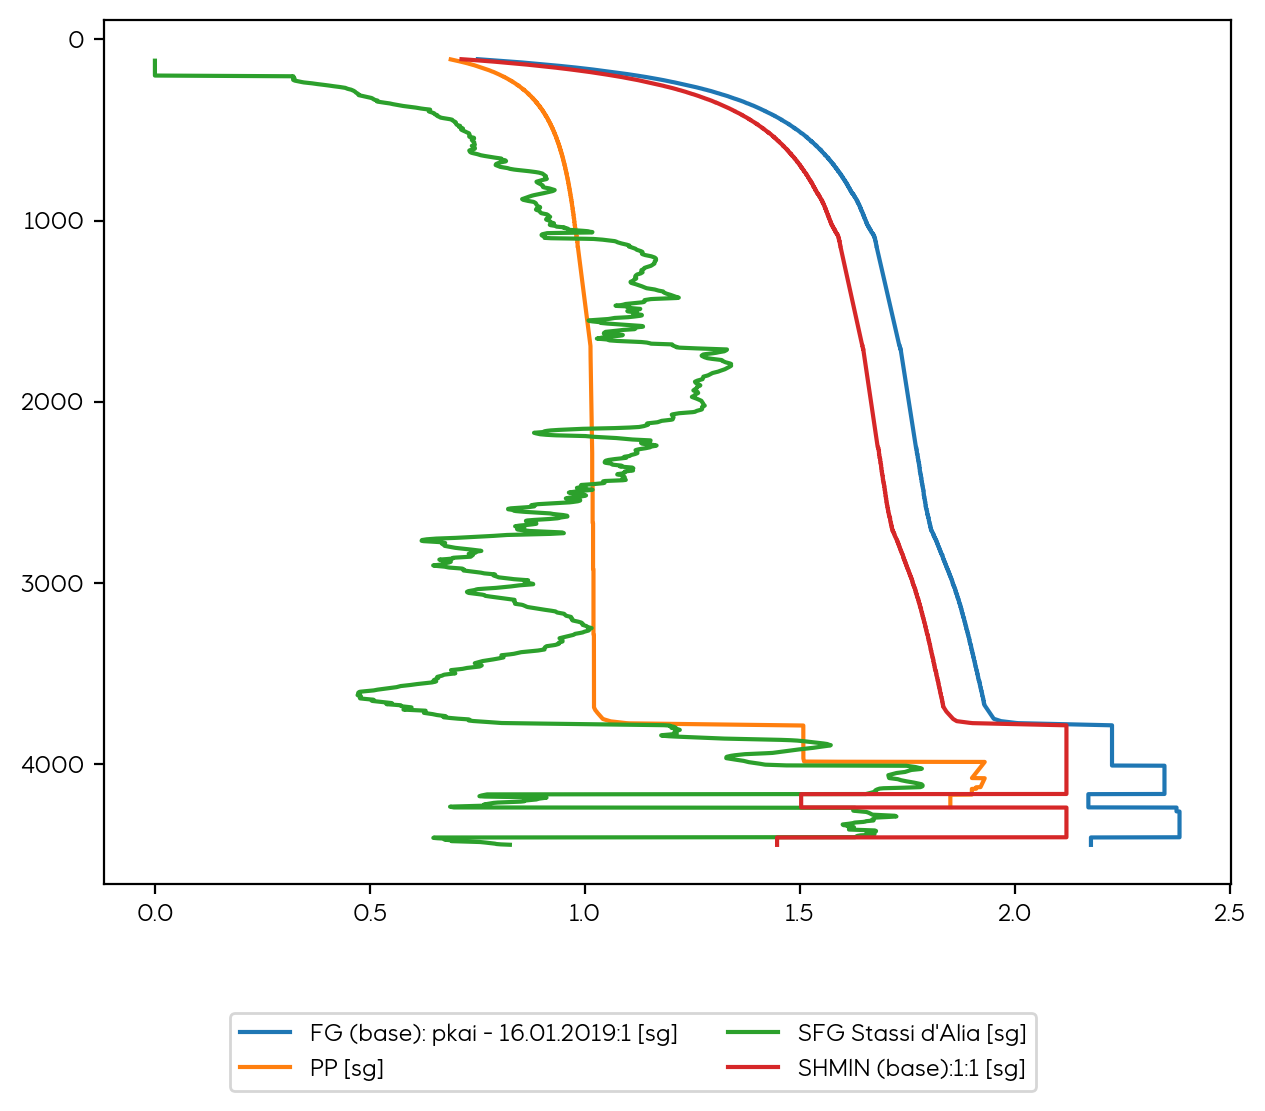

In [6]:

fig, ax = plt.subplots()

for curve in data:
    depth = curve['depthMsl']
    gradient = curve['curveValue'] 
    gradient_name = curve['curveName']
    gradient_units = curve['curveUnits']
    ax.plot(gradient, depth, label = f'{gradient_name} [{gradient_units}]')

ax.invert_yaxis()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.tight_layout()



In [7]:
manual_shmin_p = np.array(data[3]['curveValue']) * 1e3 * const.g * depth / const.bar
manual_shmin_z = np.array(data[3]['depthMsl'])

In [13]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3740.)

fluid_type='pure_co2' self.fluid_type='pure_co2'
{'from_resrvr': True, 'z_fluid_contact': 3740.0, 'specific_gravity': None, 'pvt_data': {'temperature': array([  1.   ,   1.998,   2.996,   3.994,   4.992,   5.99 ,   6.988,
         7.986,   8.984,   9.982,  10.98 ,  11.978,  12.976,  13.974,
        14.972,  15.97 ,  16.968,  17.966,  18.964,  19.962,  20.96 ,
        21.958,  22.956,  23.954,  24.952,  25.95 ,  26.948,  27.946,
        28.944,  29.942,  30.94 ,  31.938,  32.936,  33.934,  34.932,
        35.93 ,  36.928,  37.926,  38.924,  39.922,  40.92 ,  41.918,
        42.916,  43.914,  44.912,  45.91 ,  46.908,  47.906,  48.904,
        49.902,  50.9  ,  51.898,  52.896,  53.894,  54.892,  55.89 ,
        56.888,  57.886,  58.884,  59.882,  60.88 ,  61.878,  62.876,
        63.874,  64.872,  65.87 ,  66.868,  67.866,  68.864,  69.862,
        70.86 ,  71.858,  72.856,  73.854,  74.852,  75.85 ,  76.848,
        77.846,  78.844,  79.842,  80.84 ,  81.838,  82.836,  83.834,
        

<bound method Axes.plot of <Axes: xlabel='Pressure [bar]'>>

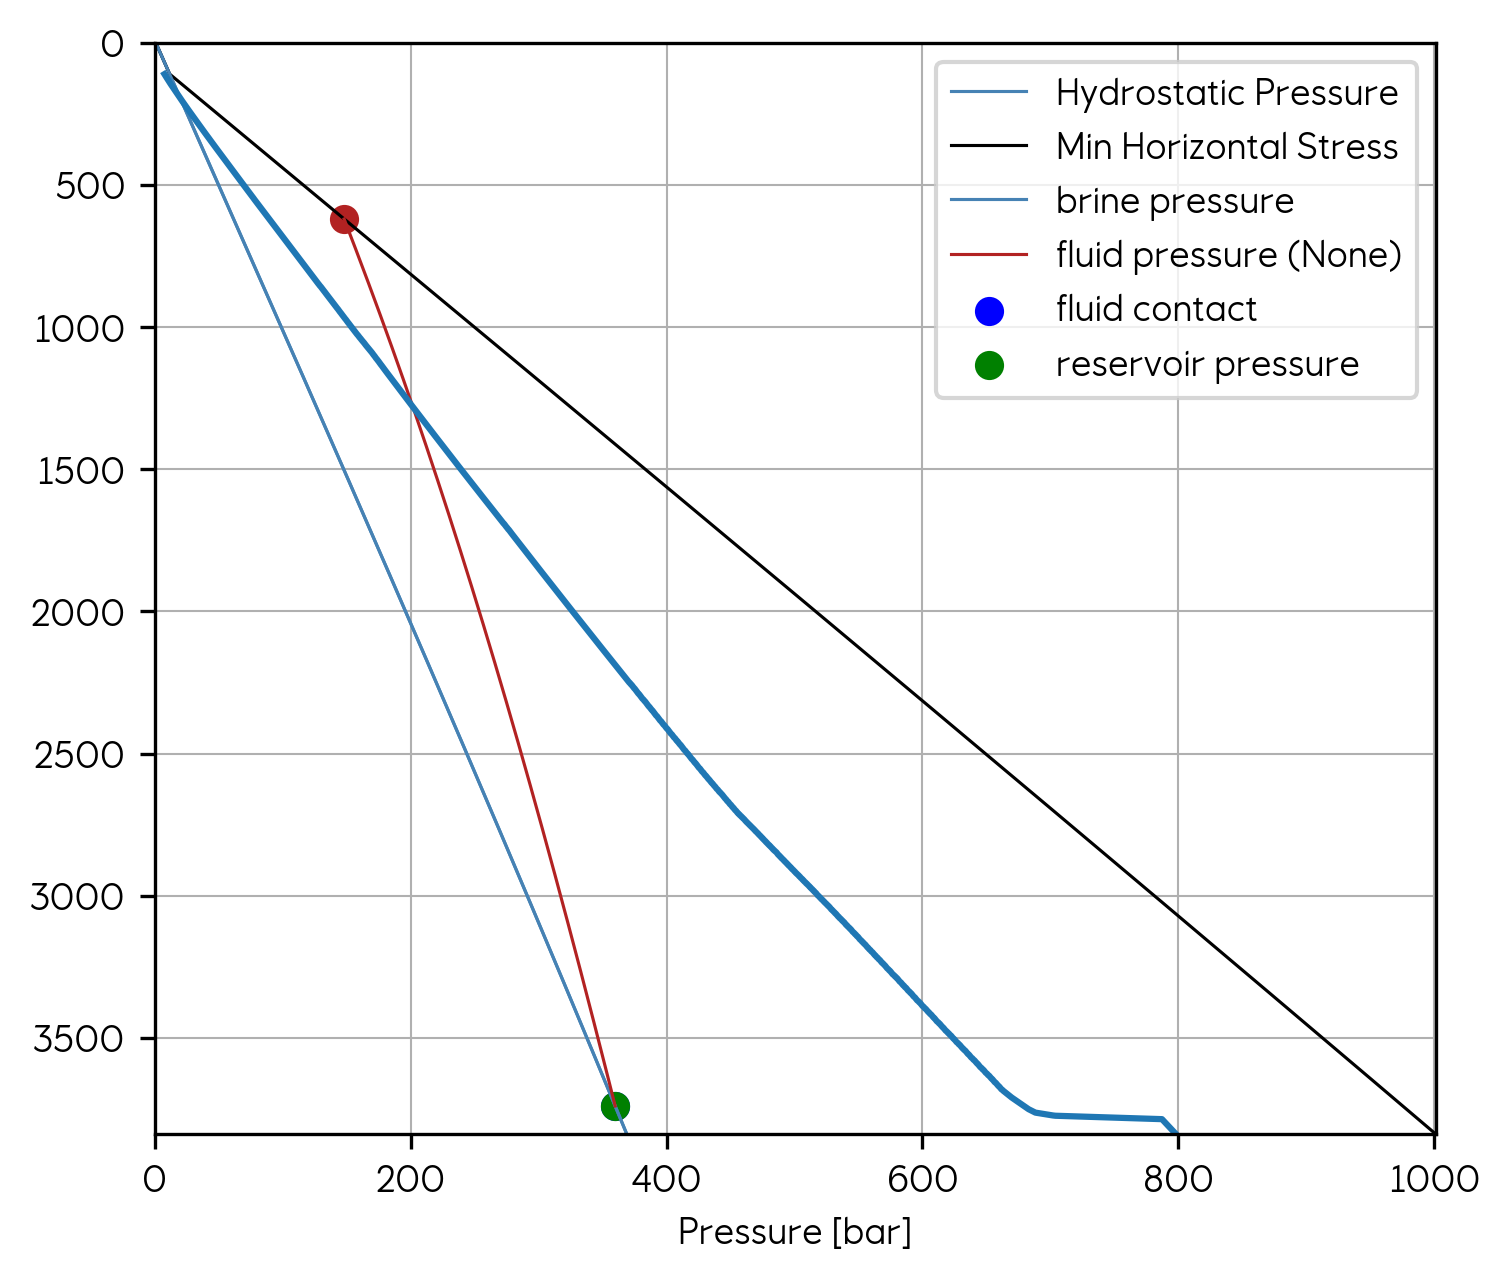

In [14]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True #plot delta p
              )
ax.plot(manual_shmin_p, manual_shmin_z, label='Manual Shmin')
# ax.set_ylim(bottom=my_pressure.well_td_rkb)
ax.plot

In [15]:
# Assuming depth_list and shmin_list are your lists of depth and Shmin values, respectively.
depth_list = manual_shmin_z  # Example depth values
shmin_list = manual_shmin_p     # Corresponding Shmin values

# Combine the lists into a 2D array where each sublist is a pair of [depth, Shmin].
ip_shmin_data = np.column_stack((depth_list, shmin_list))

my_pressure2 = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3740.,
                       ip_shmin_data = ip_shmin_data)

fluid_type='pure_co2' self.fluid_type='pure_co2'
{'from_resrvr': True, 'z_fluid_contact': 3740.0, 'specific_gravity': None, 'pvt_data': {'temperature': array([  1.   ,   1.998,   2.996,   3.994,   4.992,   5.99 ,   6.988,
         7.986,   8.984,   9.982,  10.98 ,  11.978,  12.976,  13.974,
        14.972,  15.97 ,  16.968,  17.966,  18.964,  19.962,  20.96 ,
        21.958,  22.956,  23.954,  24.952,  25.95 ,  26.948,  27.946,
        28.944,  29.942,  30.94 ,  31.938,  32.936,  33.934,  34.932,
        35.93 ,  36.928,  37.926,  38.924,  39.922,  40.92 ,  41.918,
        42.916,  43.914,  44.912,  45.91 ,  46.908,  47.906,  48.904,
        49.902,  50.9  ,  51.898,  52.896,  53.894,  54.892,  55.89 ,
        56.888,  57.886,  58.884,  59.882,  60.88 ,  61.878,  62.876,
        63.874,  64.872,  65.87 ,  66.868,  67.866,  68.864,  69.862,
        70.86 ,  71.858,  72.856,  73.854,  74.852,  75.85 ,  76.848,
        77.846,  78.844,  79.842,  80.84 ,  81.838,  82.836,  83.834,
        

<Axes: xlabel='Pressure [bar]'>

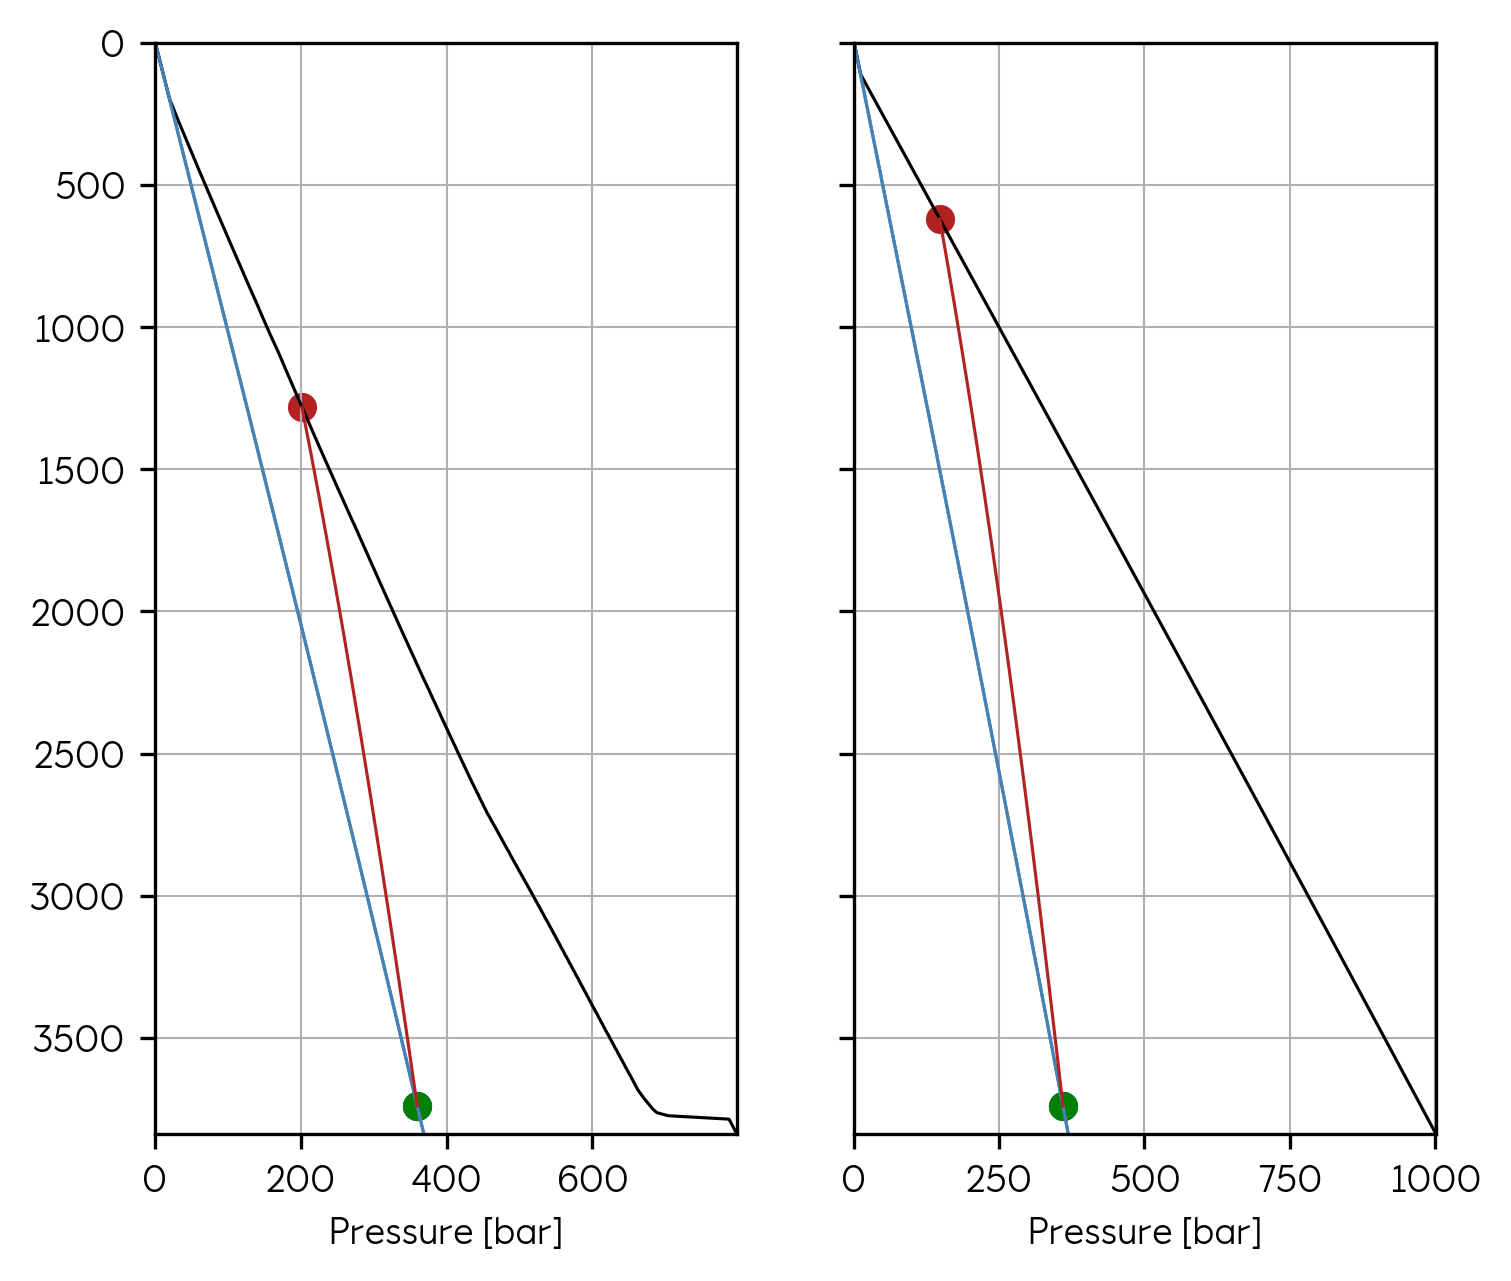

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(width, height), sharey=True)

plot_pressure(my_pressure, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

plot_pressure(my_pressure2, ax=ax1, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

fluid_type='pure_co2' self.fluid_type='pure_co2'
{'from_resrvr': True, 'z_fluid_contact': 3740.0, 'specific_gravity': None, 'pvt_data': {'temperature': array([  1.   ,   1.998,   2.996,   3.994,   4.992,   5.99 ,   6.988,
         7.986,   8.984,   9.982,  10.98 ,  11.978,  12.976,  13.974,
        14.972,  15.97 ,  16.968,  17.966,  18.964,  19.962,  20.96 ,
        21.958,  22.956,  23.954,  24.952,  25.95 ,  26.948,  27.946,
        28.944,  29.942,  30.94 ,  31.938,  32.936,  33.934,  34.932,
        35.93 ,  36.928,  37.926,  38.924,  39.922,  40.92 ,  41.918,
        42.916,  43.914,  44.912,  45.91 ,  46.908,  47.906,  48.904,
        49.902,  50.9  ,  51.898,  52.896,  53.894,  54.892,  55.89 ,
        56.888,  57.886,  58.884,  59.882,  60.88 ,  61.878,  62.876,
        63.874,  64.872,  65.87 ,  66.868,  67.866,  68.864,  69.862,
        70.86 ,  71.858,  72.856,  73.854,  74.852,  75.85 ,  76.848,
        77.846,  78.844,  79.842,  80.84 ,  81.838,  82.836,  83.834,
        

<Axes: xlabel='Pressure [bar]'>

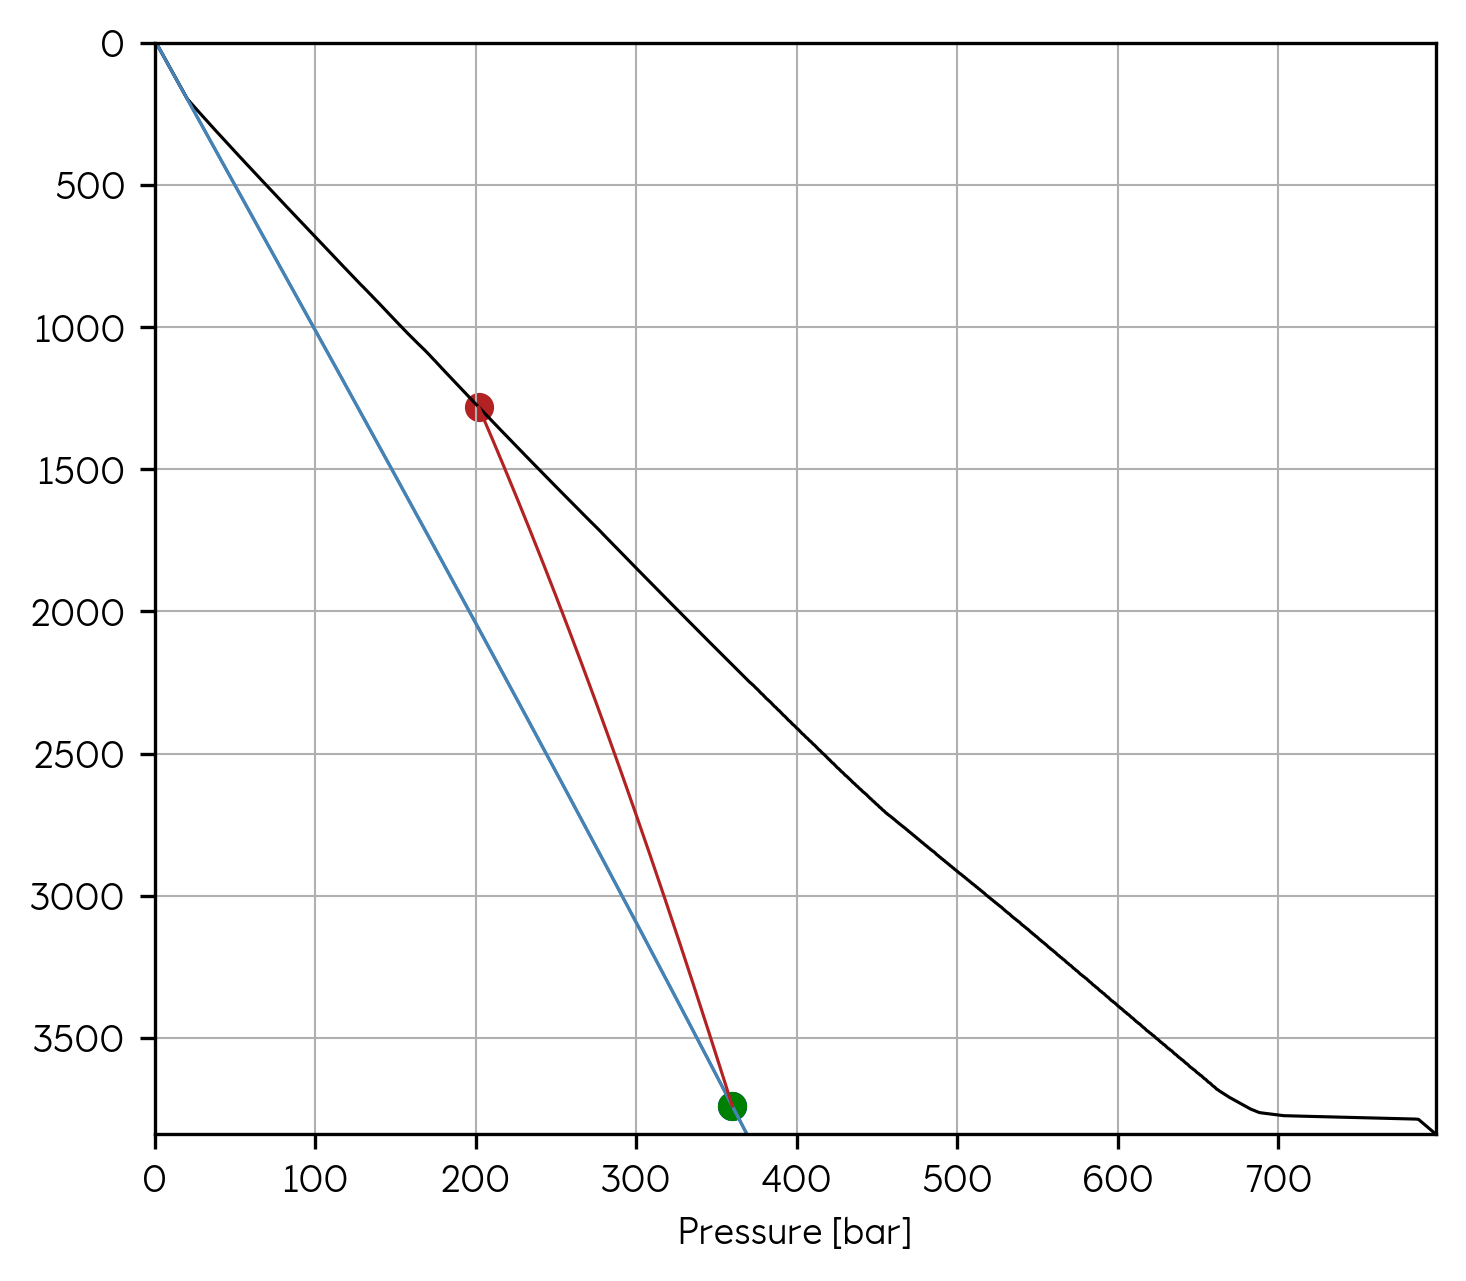

In [17]:
# Assuming depth_list and shmin_list are your lists of depth and Shmin values, respectively.
depth_list = manual_shmin_z  # Example depth values
shmin_list = manual_shmin_p     # Corresponding Shmin values

# Combine the lists into a 2D array where each sublist is a pair of [depth, Shmin].
ip_shmin_data = np.column_stack((depth_list, shmin_list))

my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3740.,
                       ip_shmin_data = ip_shmin_data)


fig, ax = plt.subplots(figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

In [44]:
list(my_pressure2.pvt_data.keys())

['temperature', 'pressure', 'brine']

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: hydrostatic
fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: test1


<Axes: xlabel='Pressure [bar]'>

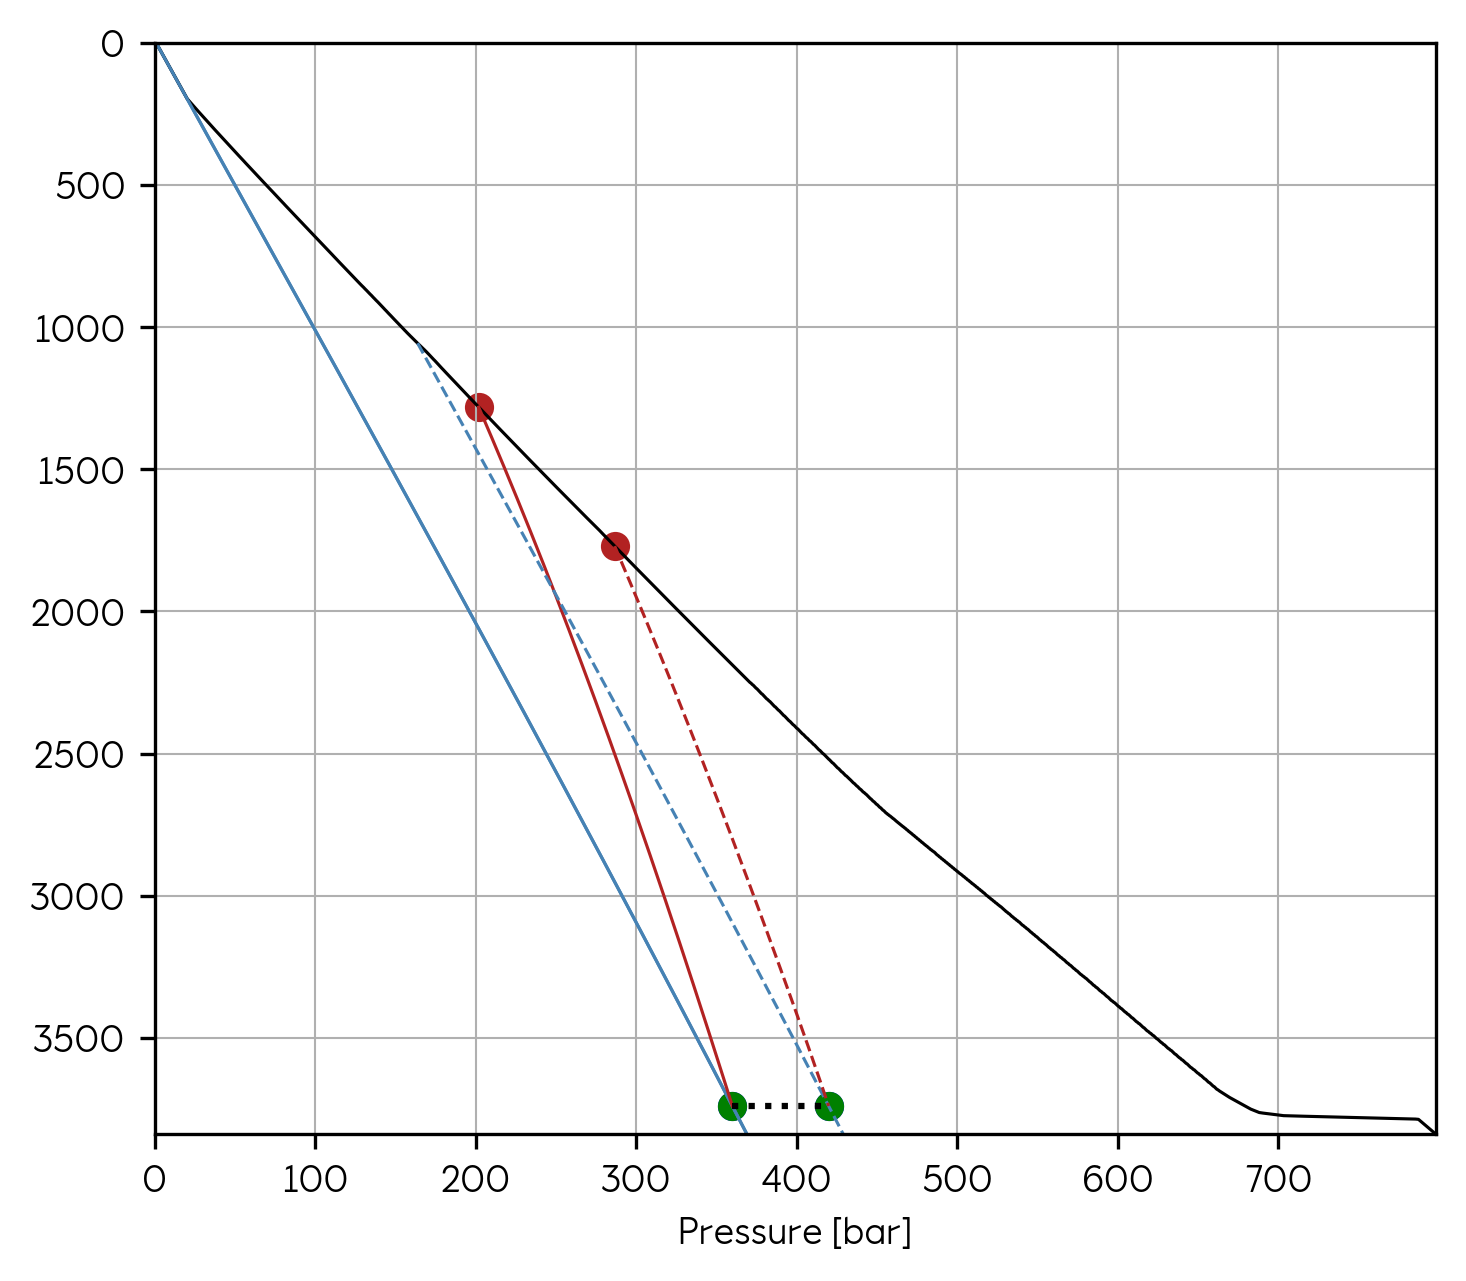

In [21]:
my_pressure2 = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3740.,
                       ip_shmin_data = ip_shmin_data)


my_pressure2.add_scenario('test1', from_resrvr=True, p_delta = 60)



fig, ax = plt.subplots(figsize=(width, height))

plot_pressure(my_pressure2, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

In [59]:
from pathlib import Path

a = Path(my_pressure2.pvt_path)

for b in a.iterdir():
    if b.is_dir():
        print(b.name)


pure_co2
mixture2
water
methane
mixture1


fluid_type=None self.fluid_type=None
Computing pressure profile for scenario: hydrostatic


<Axes: xlabel='Pressure [bar]'>

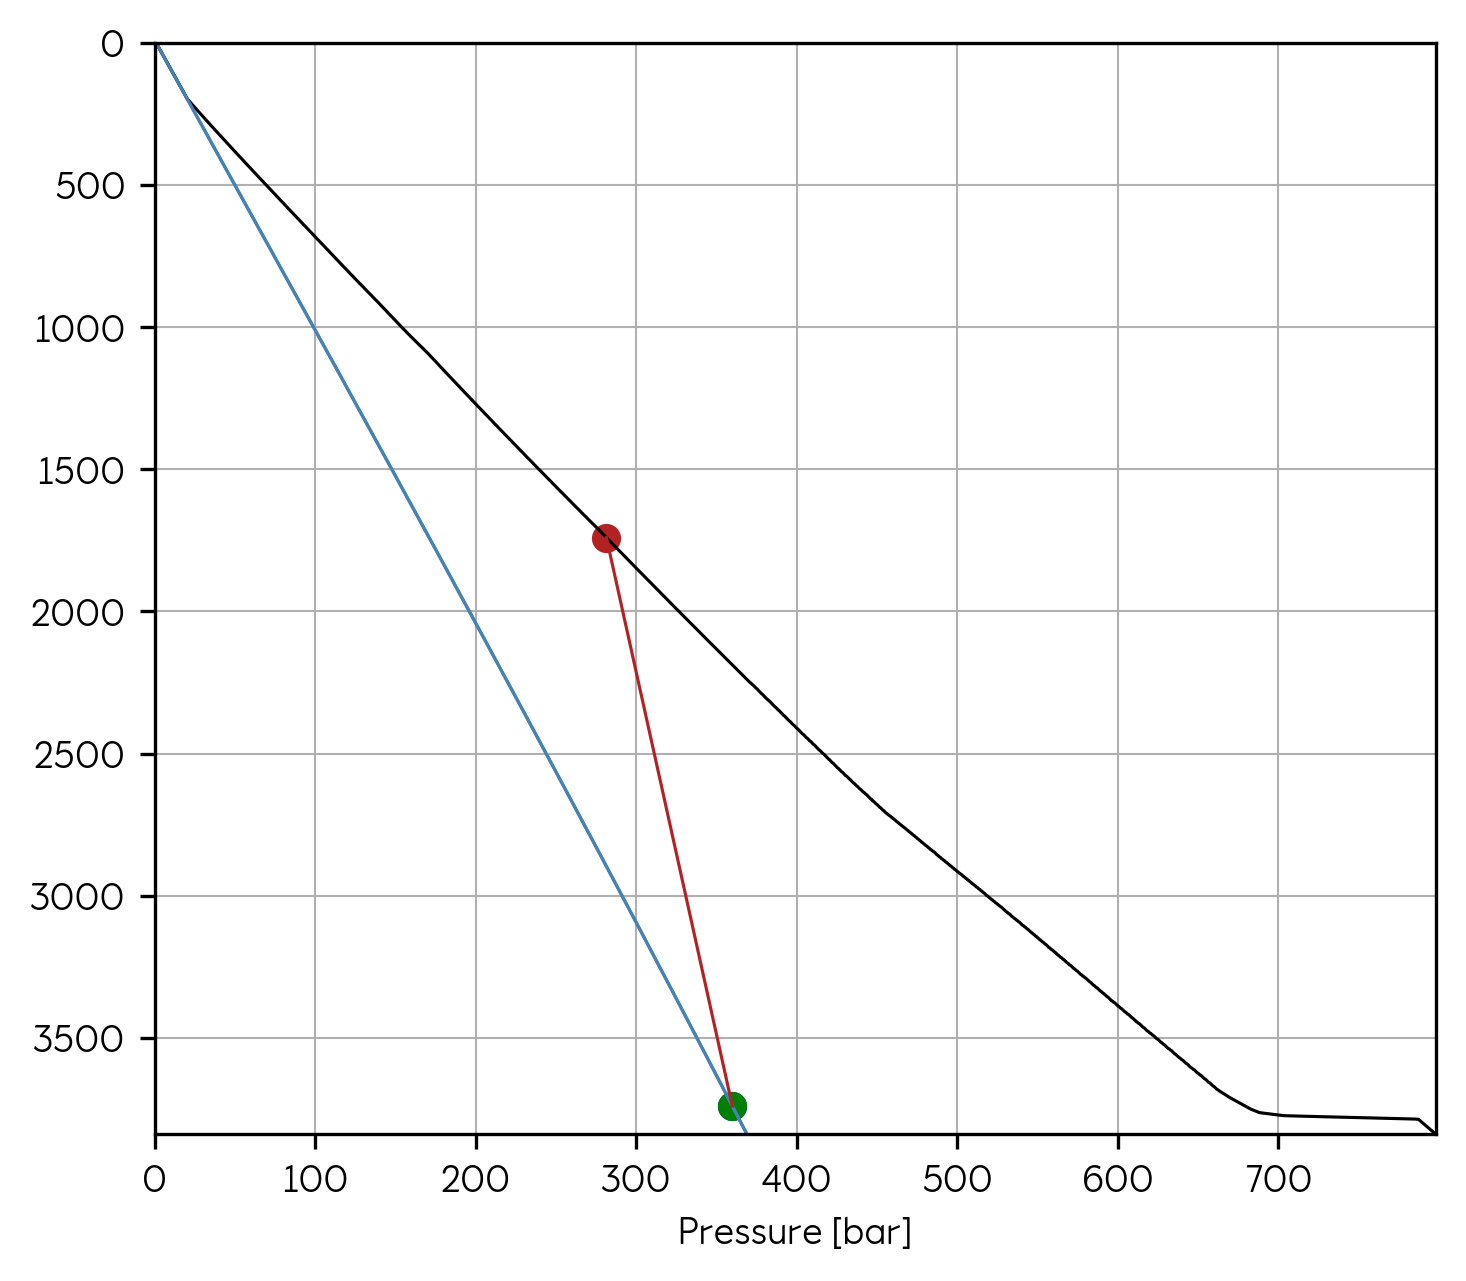

In [31]:
my_pressure2 = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type=None,
                       specific_gravity=0.4,
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3740.,
                       ip_shmin_data = ip_shmin_data)


fig, ax = plt.subplots(figsize=(width, height))

plot_pressure(my_pressure2, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

fluid_type='pure_co2' self.fluid_type=None
Computing pressure profile for scenario: test1
fluid_type=None self.fluid_type=None
Computing pressure profile for scenario: test2


<Axes: xlabel='Pressure [bar]'>

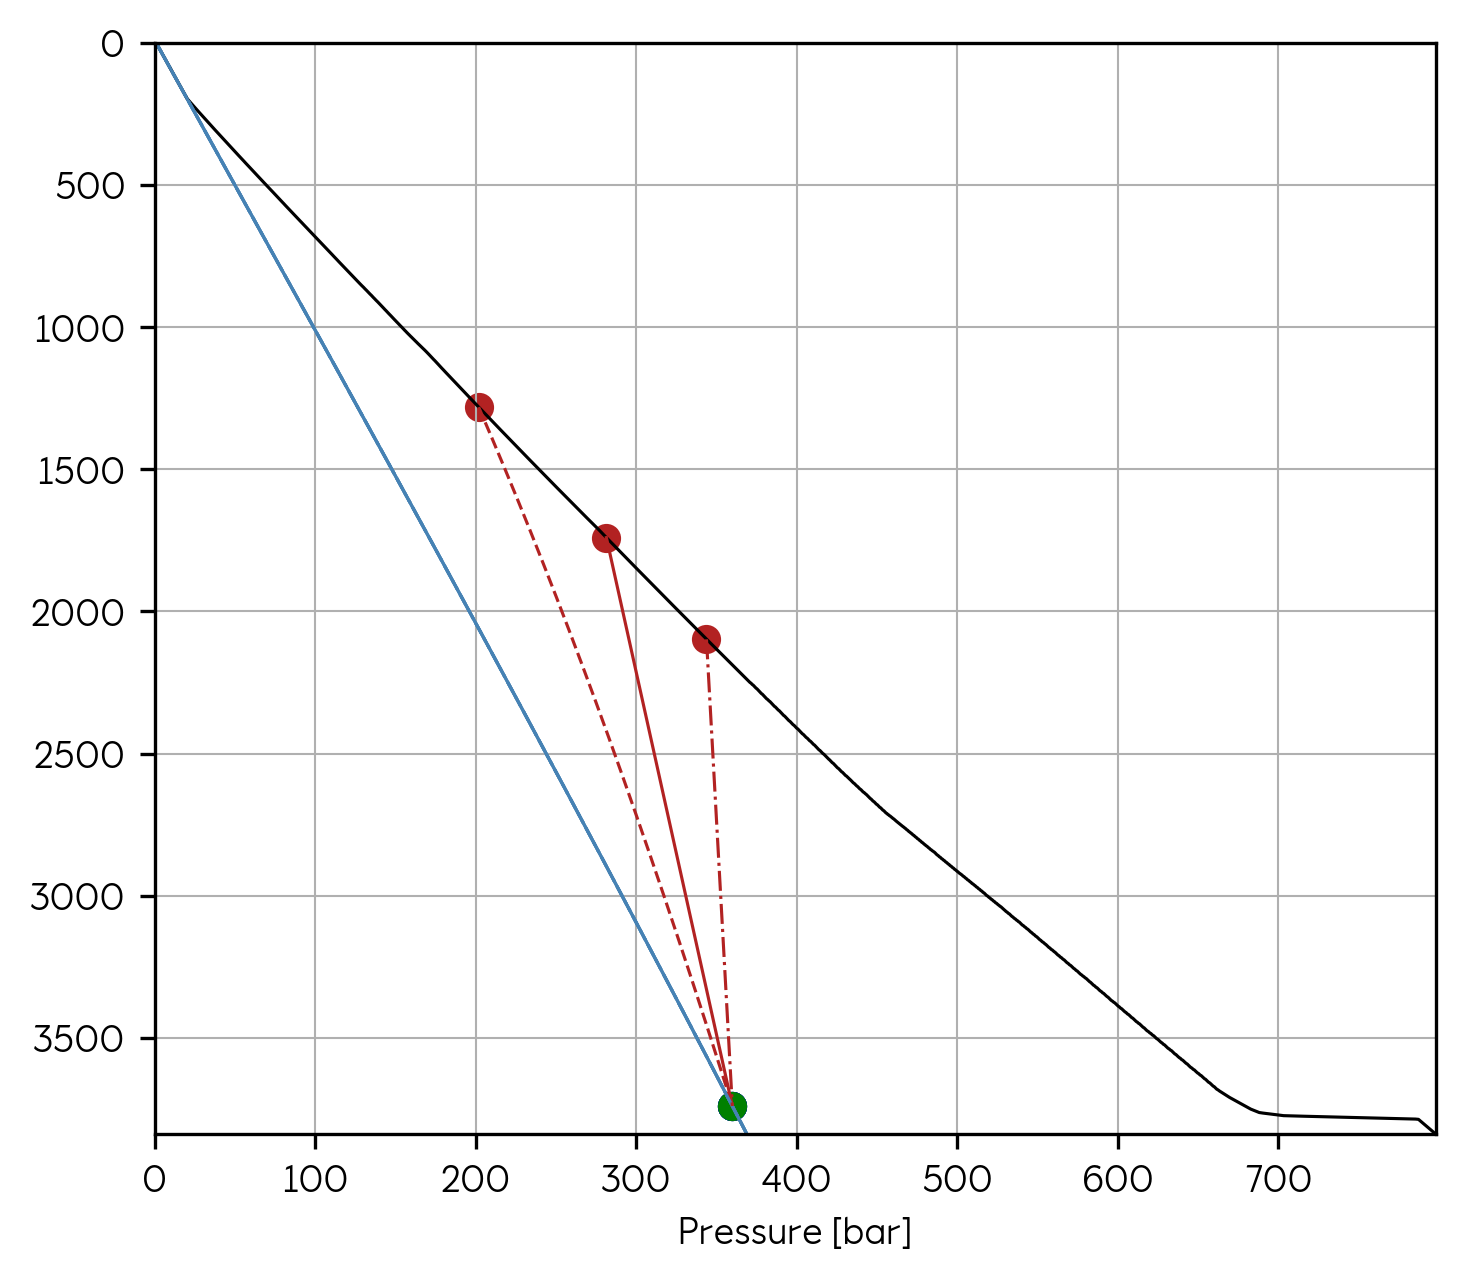

In [32]:
my_pressure2.add_scenario('test1', fluid_type='pure_co2', from_resrvr=True)

my_pressure2.add_scenario('test2', specific_gravity=0.1, from_resrvr=True)


fig, ax = plt.subplots(figsize=(width, height))

plot_pressure(my_pressure2, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

In [33]:
my_pressure2.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,hydrostatic,True,1739.969179,281.417762,3740.0,359.872171,3740.0,359.872171,0,None,None,0.4
1,test1,True,1280.534311,201.821174,3740.0,359.872171,3740.0,359.872171,0,None,100% CO2,NaN
2,test2,True,2097.080120,343.760631,3740.0,359.872171,3740.0,359.872171,0,None,None,0.1


In [16]:
my_pressure2 = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='my_fluid',
                       specific_gravity=0.8,
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3740.,
                       ip_shmin_data = ip_shmin_data)



KeyError: 'my_fluid'

In [ ]:

my_pressure2.add_scenario('test1', fluid_type='methane', from_resrvr=True)

fig, ax = plt.subplots(figsize=(width, height))

plot_pressure(my_pressure2, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

In [63]:
my_pressure2.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,hydrostatic,True,899.966635,137.062466,3740.0,359.872171,3740.0,359.872171,0,my_fluid,None,0.8
1,test1,True,899.966635,137.062466,3740.0,359.872171,3740.0,359.872171,0,methane,None,0.8


T

To compute the minimum horizontal stress curve in bars or Pascals, you'll need to use the depth (in meters) and specific gravity (SG) values. Here's a step-by-step guide:

### Convert Depth to Pressure:

The pressure at a given depth can be calculated using the formula: $P = \rho \cdot g \cdot h$ where:
- $P$ is the pressure in Pascals (Pa).
- $\rho$ is the density of the fluid (in kg/m³).
- $g$ is the acceleration due to gravity (9.81 m/s²).
- $h$ is the depth in meters (m).

### Calculate Density:

The density ($\rho$) can be derived from the specific gravity (SG) using the formula: $\rho = \text{SG} \cdot \rho_{\text{water}}$ where:
- $\rho_{\text{water}}$ is the density of water (approximately 1000 kg/m³).

### Compute Pressure:

Substitute the values into the pressure formula to get the pressure in Pascals.

### Convert to Bars:

To convert Pascals to bars, use the conversion factor: $1 \text{ bar} = 100,000 \text{ Pa}$

### Here's a sample calculation:

Given:
- Depth ($h$) = 1000 meters
- Specific Gravity (SG) = 1.2

### Steps:

1. Calculate density: $\rho = 1.2 \cdot 1000 \text{ kg/m}^3 = 1200 \text{ kg/m}^3$
2. Calculate pressure in Pascals: $P = 1200 \text{ kg/m}^3 \cdot 9.81 \text{ m/s}^2 \cdot 1000 \text{ m} = 11,772,000 \text{ Pa}$
3. Convert to bars: $P = \frac{11,772,000 \text{ Pa}}{100,000} = 117.72 \text{ bars}$

You can apply these steps to each row in your table to compute the minimum horizontal stress curve in bars or Pascals. If you need further assistance with the calculations or have any other questions, feel free to ask!o compute the minimum horizontal stress curve in bars or Pascals, you'll need to use the depth (in meters) and specific gravity (SG) values. Here's a step-by-step guide:

Convert Depth to Pressure:

The pressure at a given depth can be calculated using the formula: $[ P = \rho \cdot g \cdot h ]$ where:
( $P$ ) is the pressure in Pascals (Pa).

( $\rho$ ) is the density of the fluid (in kg/m³).
( $g$ ) is the acceleration due to gravity (9.81 m/s²).
( h ) is the depth in meters (m).
Calculate Density:

The density (( \rho )) can be derived from the specific gravity (SG) using the formula: [ \rho = \text{SG} \cdot \rho_{\text{water}} ] where:
( \rho_{\text{water}} ) is the density of water (approximately 1000 kg/m³).
Compute Pressure:

Substitute the values into the pressure formula to get the pressure in Pascals.
Convert to Bars:

To convert Pascals to bars, use the conversion factor: [ 1 \text{ bar} = 100,000 \text{ Pa} ]
Here's a sample calculation:

Given:

Depth (( h )) = 1000 meters
Specific Gravity (SG) = 1.2
Steps:

Calculate density: [ \rho = 1.2 \cdot 1000 \text{ kg/m}^3 = 1200 \text{ kg/m}^3 ]
Calculate pressure in Pascals: [ P = 1200 \text{ kg/m}^3 \cdot 9.81 \text{ m/s}^2 \cdot 1000 \text{ m} = 11,772,000 \text{ Pa} ]
Convert to bars: [ P = \frac{11,772,000 \text{ Pa}}{100,000} = 117.72 \text{ bars} ]
You can apply these steps to each row in your table to compute the minimum horizontal stress curve in bars or Pascals. If you need further assistance with the calculations or have any other questions, feel free to ask!

In [18]:
const

{'Wien displacement law constant': (0.0028977685, 'm K', 5.1e-09),
 'atomic unit of 1st hyperpolarizablity': (3.20636151e-53,
  'C^3 m^3 J^-2',
  2.8e-60),
 'atomic unit of 2nd hyperpolarizablity': (6.2353808e-65,
  'C^4 m^4 J^-3',
  1.1e-71),
 'atomic unit of electric dipole moment': (8.47835309e-30, 'C m', 7.3e-37),
 'atomic unit of electric polarizablity': (1.648777274e-41,
  'C^2 m^2 J^-1',
  1.6e-49),
 'atomic unit of electric quadrupole moment': (4.48655124e-40,
  'C m^2',
  3.9e-47),
 'atomic unit of magn. dipole moment': (1.8548019e-23, 'J T^-1', 1.6e-30),
 'atomic unit of magn. flux density': (235051.756758, 'T', 7.1e-05),
 'deuteron magn. moment': (4.33073482e-27, 'J T^-1', 3.8e-34),
 'deuteron magn. moment to Bohr magneton ratio': (0.0004669754567, '', 5e-12),
 'deuteron magn. moment to nuclear magneton ratio': (0.8574382329,
  '',
  9.2e-09),
 'deuteron-electron magn. moment ratio': (-0.0004664345548, '', 5e-12),
 'deuteron-proton magn. moment ratio': (0.3070122084, '', 4.5

In [12]:
data[3].keys()

dict_keys(['curveType', 'curveName', 'depthType', 'curveUnits', 'depthUnits', 'wellboreName', 'depthMsl', 'curveValue'])